11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8762 - loss: 0.4358
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9663 - loss: 0.1143
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9780 - loss: 0.0765
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9837 - loss: 0.0555
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9868 - loss: 0.0418
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9706 - loss: 0.1027
Test Accuracy: 0.9739999771118164
Enter image path with 2 digits: 57.jpg
Digit 1: 5
Digit 2: 7


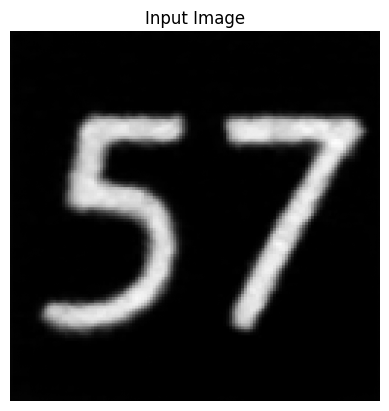

In [1]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

# ---- Train simple MNIST model ----
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, verbose=1)
print("Test Accuracy:", model.evaluate(x_test, y_test)[1])


# ---- Predict 2 digits from one image ----
def predict_two(path):
    img = cv2.imread(path, 0)         # grayscale
    h, w = img.shape

    # split left & right
    L = img[:, :w//2]
    R = img[:, w//2:]

    def prep(x):
        x = cv2.resize(x, (28,28))/255.0
        return x.reshape(1,28,28)

    for i, part in enumerate([L, R], 1):
        p = model.predict(prep(part), verbose=0)
        print(f"Digit {i}: {np.argmax(p)}")

    # show image
    plt.imshow(img, cmap="gray")
    plt.title("Input Image")
    plt.axis("off")
    plt.show()


# ---- Run ----
path = input("Enter image path with 2 digits: ")
predict_two(path)
